In [1]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
import torch
from torch import nn
import os
from sklearn.preprocessing import StandardScaler
from multiprocessing import cpu_count

In [2]:
# # Load data into memory
# # These datasets come come pre-packaged with colab, so it's best to run this lesson there.
# housing = pd.read_csv('sample_data/california_housing_train.csv')
# housing_test = pd.read_csv('sample_data/california_housing_test.csv')
# import california housing dataset from sklearn:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
housing['median_house_value'] = california_housing.target
housing_test = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
housing_test['median_house_value'] = california_housing.target

housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
housing_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
housing.agg(['mean','std'])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956


In [5]:
x_train = housing.drop('median_house_value', axis=1)
y_train = housing.median_house_value.values

x_valid = housing_test.drop('median_house_value', axis=1)
y_valid = housing_test.median_house_value.values

In [6]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

In [7]:
# Check that the means of each column are close to 0
assert np.allclose(x_train_scaled.mean(axis=0), np.zeros(x_train_scaled.shape[1]))
# Check that the stds of each column are close to 1
assert np.allclose(x_train_scaled.std(axis=0), np.ones(x_train_scaled.shape[1]))

In [8]:
class HousingDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = X
        self.y = y
    
    def __len__(self):
        # What are some other ways we could do this?
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [9]:
train_ds = HousingDataset(x_train_scaled, y_train)
valid_ds = HousingDataset(x_valid_scaled, y_valid)

In [10]:
# What are the number of items in each dataset?
len(train_ds), len(valid_ds)

(20640, 20640)

In [11]:
# What is the x and y at a given index?
idx = 8

In [12]:
x, y = train_ds[idx]
x, y

(array([-0.94235915,  1.06160074, -0.45870257,  0.04425393, -0.19380963,
        -0.1004992 ,  1.03382082, -1.34280914]),
 2.267)

In [13]:
# Choose an index in your dataset
idx = 8
# Fetch an item at that index from train_ds
x, y = train_ds[idx]
# check that the x value is the same as the corresponding value from x_train_scaled at the same index
assert np.allclose(x, x_train_scaled[idx])
# check that the y value is the same as the corresponding value from y_train at the same index
assert y == y_train[idx]

In [14]:
BATCH_SIZE = 12
N_WORKERS = cpu_count()
print(f"""
In this example, each batch will contain {BATCH_SIZE} items.
We will use {N_WORKERS} workers to load data more efficiently.
""")


In this example, each batch will contain 12 items.
We will use 12 workers to load data more efficiently.



In [15]:
train_dl = DataLoader(
    train_ds, 
    batch_size=BATCH_SIZE, 
    shuffle=True, # We generally want to shuffle the train dataloader
    num_workers=N_WORKERS
)

In [16]:
valid_dl = DataLoader(
    valid_ds,
    batch_size=BATCH_SIZE, 
    shuffle=False, # We don't need to shuffle the validation dataloader
    num_workers=N_WORKERS
)

In [17]:
train_dl, valid_dl

(<torch.utils.data.dataloader.DataLoader at 0x1cb541b2950>,
 <torch.utils.data.dataloader.DataLoader at 0x1cb541b23e0>)

In [21]:
# Pull one single batch of data from the training dataloader
x_batch, y_batch = next(iter(train_dl))
x_batch, y_batch

In [ ]:
# What's the type? The length?
type(batch), len(batch)

NameError: name 'batch' is not defined

In [ ]:
# This looks like our X
batch[0].shape

In [ ]:
# This looks like our y
batch[1].shape

In [ ]:
for x_batch, y_batch in train_dl:
    break

In [ ]:
x_batch.shape, y_batch.shape

In [ ]:
x_batch

In [ ]:
y_batch

In [18]:
# We're just using fastai for the datasets for now.
# We'll learn how to use it for modeling later on.
!pip install -Uqq fastai

In [18]:
# Download and extract the data
from fastai.data.all import URLs, untar_data
from fastcore.basics import Path
from PIL import Image
import numpy as np

path = untar_data(URLs.CIFAR)

In [19]:
# what files or directories are in the path variable?
path.ls()

(#3) [Path('C:/Users/3296422/.fastai/data/cifar10/labels.txt'),Path('C:/Users/3296422/.fastai/data/cifar10/test'),Path('C:/Users/3296422/.fastai/data/cifar10/train')]

In [20]:
# what is contained in path/'train'?
(path/'train').ls()

(#10) [Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane'),Path('C:/Users/3296422/.fastai/data/cifar10/train/automobile'),Path('C:/Users/3296422/.fastai/data/cifar10/train/bird'),Path('C:/Users/3296422/.fastai/data/cifar10/train/cat'),Path('C:/Users/3296422/.fastai/data/cifar10/train/deer'),Path('C:/Users/3296422/.fastai/data/cifar10/train/dog'),Path('C:/Users/3296422/.fastai/data/cifar10/train/frog'),Path('C:/Users/3296422/.fastai/data/cifar10/train/horse'),Path('C:/Users/3296422/.fastai/data/cifar10/train/ship'),Path('C:/Users/3296422/.fastai/data/cifar10/train/truck')]

In [21]:
# find the paths for 10 images of airplanes from the train dataset.
airplane_paths = (path/'train'/'airplane').ls()[:10]
airplane_paths

(#10) [Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10008_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10010_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10020_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10024_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10031_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10043_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10050_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10061_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10064_airplane.png'),Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10115_airplane.png')]

In [22]:
def list_png_files(path):
    return list(path.glob('**/*.png'))

In [23]:
sample_files = list_png_files(path/'train')[:10]
sample_files

[Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10008_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10010_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10020_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10024_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10031_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10043_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10050_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10061_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10064_airplane.png'),
 Path('C:/Users/3296422/.fastai/data/cifar10/train/airplane/10115_airplane.png')]

In [24]:
def label_from_path_parent(path:Path) -> str:
    return path.parent.name

In [25]:
# Sanity check for label_from_parent_path
assert label_from_path_parent(Path('/root/.fastai/data/cifar10/train/horse/42500_horse.png')) == 'horse'

In [26]:
def load_image_and_label(path):
    img = Image.open(path)
    label = label_from_path_parent(path)
    return img, label

airplane


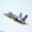

In [27]:
img, label = load_image_and_label(sample_files[0])
print(label)
img

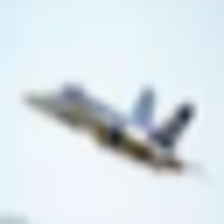

In [28]:
# Let's resize this image and inspect what it looks like
img.resize((224,224))

In [47]:
class CifarDataset(Dataset):
    def __init__(self, path):
        self.path = path
        self.files = list_png_files(path)
    
    def __len__(self):
        return len(self.files)
        

    def __getitem__(self, idx):
        return load_image_and_label(self.files[idx])

In [48]:
train_cifar = CifarDataset(path/'train')

automobile


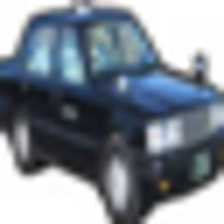

In [49]:
img, label = train_cifar[8000]
print(label)
img.resize((224, 224))

In [50]:
def img_to_scaled_tensor(img, channels_first=True):
    t = torch.tensor(np.array(img) / 255).float()
    if channels_first:
        return t.permute(2, 0, 1)
    return t

In [51]:
img_t = img_to_scaled_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [52]:
classes = {d.name:i  for i, d in enumerate((path/'train').ls())}
classes

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [53]:
def class_to_idx(class_name):
    return classes.get(class_name)

In [55]:
def collate_fn(batch):
    # The batch comes in the format ((x1, y1), (x2, y2), ..., (xn, yn)).
    # Let's split this up into our xs and our ys.
    xs, ys = list(zip(*batch))
    # Let's create a tensor that concatenates all our images on a new axis.
    # Is there another way to do this?
    xs = torch.cat([img_to_scaled_tensor(i).unsqueeze(0) for i in xs], dim=0)
    # Let's create another tensor that combines all our class labels.
    ys = torch.tensor([class_to_idx(i) for i in ys])

    return xs, ys

In [56]:
# Test the collate function
items = (train_cifar[0], train_cifar[1])
items

((<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>, 'airplane'),
 (<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>, 'airplane'))

In [57]:
x_b, y_b = collate_fn(items)

In [58]:
x_b.shape, y_b.shape

(torch.Size([2, 3, 32, 32]), torch.Size([2]))

In [59]:
train_cifar_dl = DataLoader(
    train_cifar, 
    batch_size=BATCH_SIZE, 
    num_workers=N_WORKERS,
    shuffle=True, 
    collate_fn=collate_fn
)

In [60]:
for x_b, y_b in train_cifar_dl:
    break